In [1]:
import os
os.environ["PYTENSOR_FLAGS"] = "cxx="


In [2]:
import pymc as pm


In [3]:
import sys
from pathlib import Path

ROOT_DIR = Path().resolve().parent
sys.path.append(str(ROOT_DIR))


In [4]:
import src.data_loader as dl
print(dl.__file__)
print(dir(dl))


C:\Users\Hanan\Downloads\week 11\brent-oil-bayesian-change-point-analysis_week_10\src\data_loader.py
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'load_brent_data', 'load_event_data', 'pd']


In [5]:
import pandas as pd

events_df_raw = pd.read_csv("../data/key_oil_market_events.csv")
print(events_df_raw.columns)


Index(['date', 'event', 'category'], dtype='str')


C:\Users\Hanan\Downloads\week 11\brent-oil-bayesian-change-point-analysis_week_10\src\data_loader.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


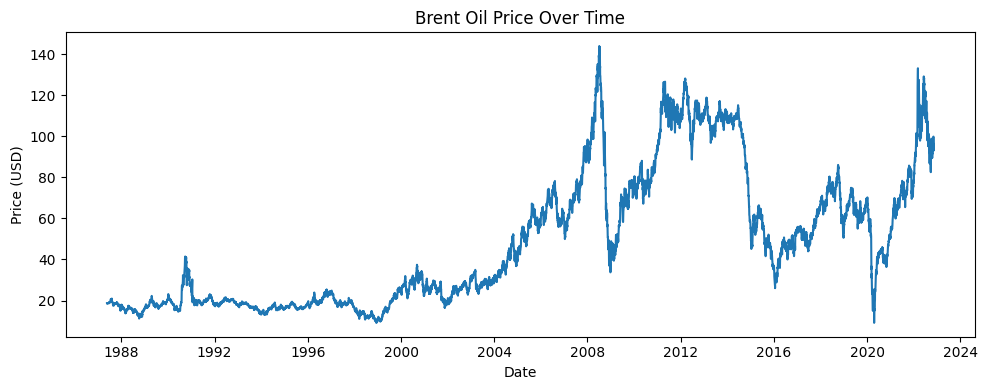

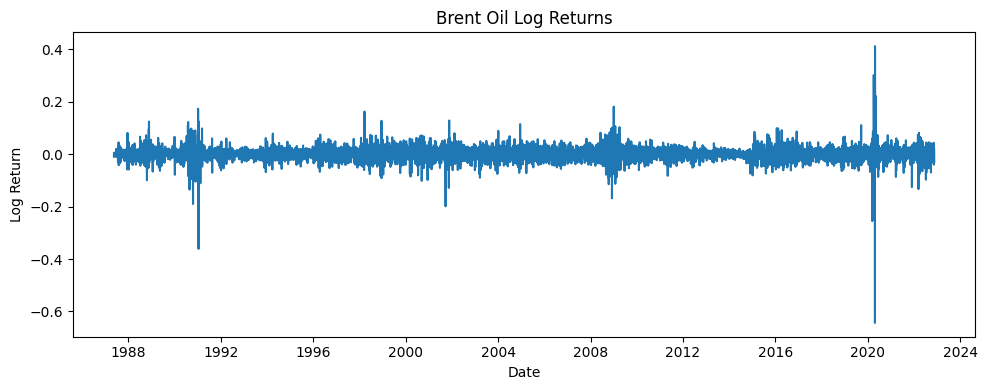

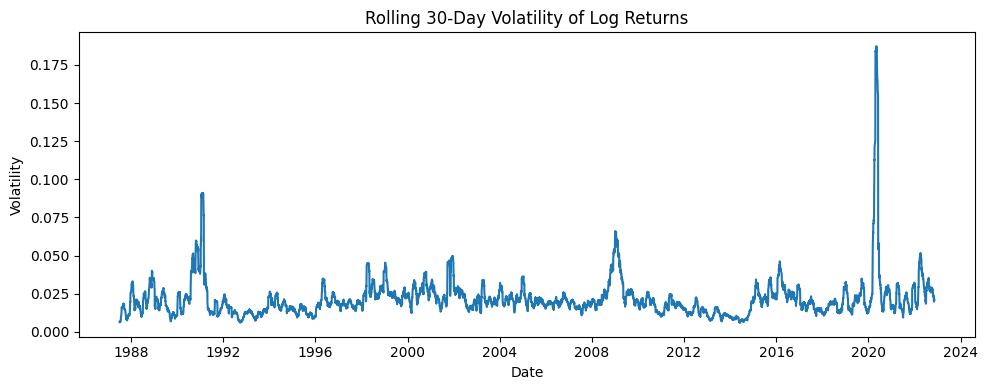

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma]


Output()

In [ ]:
from src.data_loader import load_brent_data, load_event_data
from src.preprocessing import compute_log_returns
from src.visualization import plot_price_series, plot_log_returns, plot_volatility
from src.change_point_model import run_change_point_model
import arviz as az

# Load data
price_df = load_brent_data("../data/BrentOilPrices.csv")
events_df = load_event_data("../data/key_oil_market_events.csv")

# Plot price series
plot_price_series(price_df)

# Compute log returns
log_returns = compute_log_returns(price_df)

# Plot log returns and volatility
plot_log_returns(log_returns)
plot_volatility(log_returns)

# Change point model
trace = run_change_point_model(
    log_returns["log_return"].values
)

# Diagnostics
az.summary(trace)
az.plot_trace(trace)
az.plot_posterior(trace, var_names=["tau", "mu_1", "mu_2"])
